# Preamble
The purpose of this notebook and its data is to better understand cancer care in Canada and how it changed from March 1 to May 2, 2020. This notebook is a follow-up to my previous notebook *cancer care in the time of Covid-19* and was intended to help answer "How are patterns of care changing for current patients (i.e., cancer patients)?". This notebook performs sentiment analysis on scraped tweets from across Canada that contain words related to cancer and/or Covid-19. This notebook helps us understand how the general public's attitude towards cancer care changed from March 1 to May 2, 2020. The referenced .csv file contains the scraped tweets. Details on how the tweets were retrieved is provided in the README of this repository.
# Imports and Useful Functions

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from textblob import TextBlob
from wordcloud import WordCloud

To perform sentiment analysis, it will be helpful to have functions that clean the tweets, determine the subjectivity and polarity of each tweet as well as determine if a tweet is positive or negative. These functions are defined here as well as a function that creates a word cloud.

In [27]:
def clean_tweet(tweet):
    """
    Removes mentions, hashtags, retweets, hyperlinks, and words that are less than 3 characters from tweets
    Input: tweet (string) you want cleaned
    Output: tweet (string) with mentions, hashtags, retweets, hyperlinks, and small words removed
    """
    tweet= re.sub('@[A-Za-z0-9]+','',tweet) #remove mentions
    tweet= re.sub('#','',tweet) #remove hashtags
    tweet= re.sub('RT[\s]+','',tweet) #remove retweets
    tweet= re.sub('https?:\/\/\S+','',tweet) #remove hyperlinks
    tweet= re.sub(r'\bw{1,3}\b','',tweet) #remove small words
    return tweet

def subj_tweet(tweet):
    """
    Returns subjectivity of a tweet (whether a tweet is fact- or opinion-based)
    Input: tweet (string) with all mentions, hashtags, retweets, hyperlinks, and small words removed
    Output: float between 0 and 1 (0 means tweet is fact, 1 means tweet is very much an opinion)
    """
    return TextBlob(tweet).sentiment.subjectivity

def pol_tweet(tweet):
    """
    Returns polarity of a tweet (how negative or positive a tweet is)
    Input: tweet (string) with all mentions, hashtags, retweets, hyperlinks, and small words removed
    Output: float between -1 and 1 (-1 means tweet is very negative, 1 means tweet is very positive)
    """
    return TextBlob(tweet).sentiment.polarity

def pol_percent(polarity):
    """
    Returns classification label as to whether a tweet is positive or negative
    Input: polarity (float) of a string
    Output: string ("pos"/"neg"/"neutral") indicating whether the tweet associated with the polarity is positive, negative, or neutral
    """
    if polarity <0:
        return "neg"
    elif polarity >0:
        return "pos"
    else:
        return "neutral"
    
def build_cloud(words):
    """
    Creates word cloud image from a body of text
    Input: body of text (string)
    Output: None (displays word cloud)
    """
    word_cloud= WordCloud(width= 1000, height= 600, random_state= 0, max_font_size= 110, stopwords= ['twitter','this','that','with','have','because','and','but','them','their','what','when','the','for','of','it','to']).generate(words)
    plt.figure()
    plt.imshow(word_cloud)
    plt.axis('off')
    return

# Cleaning the Dataset
The dataset consists of scraped tweets and their meta-data from across Canada. For each of the tweets, we need to determine the tweet's polarity, subjectivity, and whether the tweet is positive, negative, or neutral. Once we have this, we can start visualizing the distribution of tweets over time and the content of the tweets themselves.

In [5]:
url= "https://raw.githubusercontent.com/vvbauman/Cancer-care-in-the-time-of-Covid-19/master/canada_tweets_v2.csv"
df= pd.read_csv(url, error_bad_lines= False)
df.head()

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,...,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,city
0,False,"['COVID19', 'onpoli']",[],False,True,1,[],1.235931e+18,0,"[{'screen_name': 'Yair_Rosenberg', 'user_id': ...",...,As a recent cancer patient w/ long-standing re...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-03-06 14:38:24,2020-03-06 14:38:24,1235937783283437568,/marlawd/status/1235937783283437573,49687037,Marla Waltman 🎯,NaN,Toronto
1,False,"['COVID19', 'onpoli']",[],False,True,1,[],1.235931e+18,0,"[{'screen_name': 'Yair_Rosenberg', 'user_id': ...",...,As a recent cancer patient w/ long-standing re...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-03-06 14:38:24,2020-03-06 14:38:24,1235937783283437568,/marlawd/status/1235937783283437573,49687037,Marla Waltman 🎯,NaN,Toronto
2,False,"['Covid_19', 'onpoli']",[],True,False,4,[],NaN,4,[],...,I’m supposed to attend the @OntLiberal leaders...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-03-03 14:10:21,2020-03-03 14:10:21,1234843558009544704,/marlawd/status/1234843558009544704,49687037,Marla Waltman 🎯,NaN,Toronto
3,False,"['Covid_19', 'onpoli']",[],True,False,4,[],NaN,4,[],...,I’m supposed to attend the @OntLiberal leaders...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-03-03 14:10:21,2020-03-03 14:10:21,1234843558009544704,/marlawd/status/1234843558009544704,49687037,Marla Waltman 🎯,NaN,Toronto
4,False,[],[],False,True,1,[],1.233909e+18,0,"[{'screen_name': 'RockyMountViews', 'user_id':...",...,Buy in bulk when things are on sale and my fre...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-03-01 02:28:25,2020-03-01 02:28:25,1233942136384577536,/ghlake/status/1233942136384577536,169051022,Linda Bowser@🏠,NaN,Toronto


We'll keep only the columns we need to perform our sentiment analysis. It also looks like each tweet was retrieved twice so we'll get rid of duplicates too. Then we'll add two more columns of month and day tweet was published to make it easier to count the number of tweets published each week.

In [6]:
df_small= df[['text','timestamp','city']].copy()
df_small.drop_duplicates(inplace= True)

df_small['timestamp']= pd.to_datetime(df_small['timestamp'])
months= df_small['timestamp'].dt.month
days= df_small['timestamp'].dt.day
df_small.loc[:,'month published']= months
df_small.loc[:,'day published']= days

print('Tweets retrieved:', np.shape(df_small)[0])

Tweets retrieved: 9781


Now we can clean, get the subjectivity and polarity, and assign a "pos"/"neg"/"neutral" label for each of the tweets (this cell may take a moment to run):

In [8]:
df_small['text']= df_small['text'].apply(clean_tweet)
df_small.loc[:,'subjectivity']= df_small['text'].apply(subj_tweet)
df_small.loc[:,'polarity']= df_small['text'].apply(pol_tweet)
df_small.loc[:,'pos/neg/neural']= df_small['polarity'].apply(pol_percent)

df_small.head()

,text,timestamp,city,month published,day published,subjectivity,polarity,pos/neg/neural
0,As a recent cancer patient / long-standing res...,2020-03-06 14:38:24,Toronto,3,6,0.496429,-0.080952,neg
2,I’m supposed to attend the leadership convent...,2020-03-03 14:10:21,Toronto,3,3,0.537778,-0.230000,neg
4,Buy in bulk when things are on sale and my fre...,2020-03-01 02:28:25,Toronto,3,1,0.600000,0.700000,pos
6,To protect yourself from any fatal disease lik...,2020-03-06 16:20:04,Toronto,3,6,0.066667,0.000000,neutral
8,"just watched A Walk to Remember(again), so to...",2020-03-01 20:02:16,Toronto,3,1,0.550000,0.562500,pos


# Data Visualization - Sentiment Analysis and Distributions of Tweets
Now that our data set is all cleaned up and has the additional information needed for sentiment analysis, we can visualize how many tweets were published each week from March 1 to May 2, 2020. We can also build a word cloud of frequently tweeted words and get the distribution of positive/negative/neutral tweets.

<BarContainer object of 9 artists>

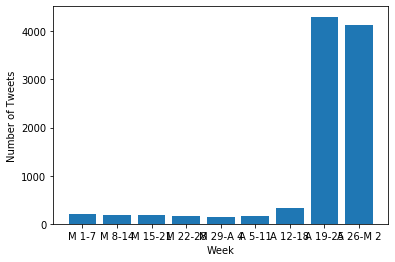

In [10]:
#count the number of tweets published each week and put into one array
wk1= df_small[(df_small['month published'] == 3) & (df_small['day published'].between(1,7))]
wk2= df_small[(df_small['month published'] == 3) & (df_small['day published'].between(8,14))]
wk3= df_small[(df_small['month published'] == 3) & (df_small['day published'].between(15,21))]
wk4= df_small[(df_small['month published'] == 3) & (df_small['day published'].between(22,28))]
wk5= df_small[(df_small['month published'] == 3) & (df_small['day published'].between(29,31))]
wk5_2= df_small[(df_small['month published'] == 4) & (df_small['day published'].between(1,4))]
wk6= df_small[(df_small['month published'] == 4) & (df_small['day published'].between(5,11))]
wk7= df_small[(df_small['month published'] == 4) & (df_small['day published'].between(12,18))]
wk8= df_small[(df_small['month published'] == 4) & (df_small['day published'].between(19,25))]
wk9= df_small[(df_small['month published'] == 4) & (df_small['day published'].between(26,30))]
wk9_2= df_small[(df_small['month published'] == 5) & (df_small['day published'].between(1,2))]

tweet_counts= np.array([np.shape(wk1)[0], np.shape(wk2)[0], np.shape(wk3)[0], np.shape(wk4)[0], np.shape(wk5)[0]+np.shape(wk5_2)[0], np.shape(wk6)[0], np.shape(wk7)[0], np.shape(wk8)[0], np.shape(wk9)[0]+np.shape(wk9_2)[0]])

#visualize tweet counts
x_axis= np.array(['M 1-7', 'M 8-14', 'M 15-21', 'M 22-28', 'M 29-A 4', 'A 5-11', 'A 12-18', 'A 19-25', 'A 26-M 2'])
plt.figure()
plt.xlabel('Week')
plt.ylabel('Number of Tweets')
plt.bar(x_axis, tweet_counts)

**Clearly the most tweets were published during the weeks of April 19-25 and April 26-May 2.** For now, we'll use all of the tweets from all of the weeks to create a word cloud and to see if people's tweets regarding Covid-19 and/or cancer are generally positive, negative, or neutral.

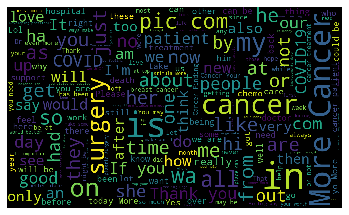

In [28]:
words= ' '.join([tweet for tweet in df_small['text']])
build_cloud(words)

**From this word cloud, there is a great variety of tweets regarding Covid-19 and cancer**; the most common words among the retrieved tweets are the search terms that were used to retrieve the tweets. If some of the large words in this word cloud were words like "cancelled", "postponed", "rescheduled", "unknown", and "scared", this would suggest that many people were tweeting about changes to their cancer treatment plan. However, this doesn't appear to be the case. Instead, we just see a large variety of words, suggesting people were tweeting about many different things with a common theme of Covid-19 and/or cancer.

For all of the tweets, let's visualize polarity vs. subjectivity. Recall that a polarity score of -1 means the tweet is very negative and a score of 1 means the tweet is very positive. A subjectivity score of 0 means that the tweet is a fact and a score of 1 means the tweet is very much an opinion:

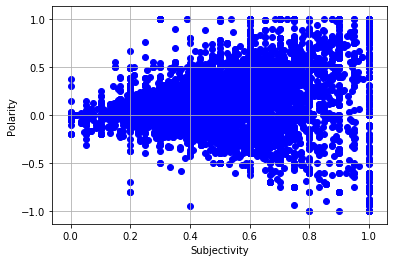

In [19]:
N,d= np.shape(df_small)
plt.figure()
plt.grid()
plt.xlabel('Subjectivity')
plt.ylabel('Polarity')
for i in range(N):
    plt.scatter(df_small.iloc[i,5], df_small.iloc[i,6], color= 'blue')

**Based on this plot, the majority of tweets were positive and opinion-based**; the majority of points have a subjectivity score >0.5 and a polarity score >0.0. This suggests that the twitter users publishing these tweets had a positive attitude when it came to Covid-19 and cancer care. Reading and categorizing the published tweets could verify what exactly people were feeling positive about but this has not been included as part of this notebook.

Since the majority of tweets were published in the weeks of April 19-25 and April 26-May 2, let's build a word cloud using the tweets from the seven preceding weeks (March 1 - April 18).

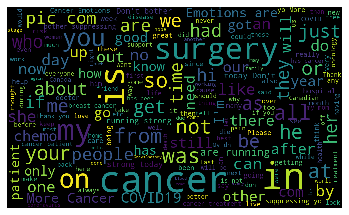

In [29]:
all_but89= df_small.drop(df_small[(df_small['month published'] == 4) & (df_small['day published'].between(19,30))].index)
all_but89= all_but89.drop(all_but89[(all_but89['month published'] == 5) & (all_but89['day published'].between(1,2))].index)

words= ' '.join([tweet for tweet in all_but89['text']])
build_cloud(words)

**Once again, in this word cloud we see a variety of words, suggesting that the only thing common among the tweets are the search terms themselves.** It is also worth noting that both words cloud support that the majority of tweets are positive; noticeable words in these clouds include "strong", "support", "love", and "thank".

# Conclusion
The purpose of this notebook was to better understand cancer care in Canada and how it changed from March 1 - May 2, 2020 using tweets that contain particular words related to Covid-19 and/or cancer. People in Canada tweeted the most about Covid-19 and/or cancer in the weeks of April 19-25 and April 26-May 2 compared to all other weeks since March 1. The majority of tweets about Covid-19 and/or cancer were positive and opinion-based. **The Twitter data retrieved for this notebook indicates there was little to no change in cancer care in Canada from March 1 to May 2, 2020; the majority of tweets published during this time do not indicate changes to one's cancer treatment.** This doesn't mean cancer care did not change during this time frame. Future work should include investigating quantitative data from hospitals.